Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import linear regression model

Lasso to help pick model from feature space and to reduce ommitted variable bias and multi-collinearity

In [9]:
df = pd.read_csv('cleaned_hotel_booking.csv')

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015-07-01,2015,July,1,27,0,1,...,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015-07-01,2015,July,1,27,0,1,...,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015-07-01,2015,July,1,27,0,2,...,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015-07-01,2015,July,1,27,0,2,...,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015-07-01,2015,July,1,27,0,2,...,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [15]:
lasso_df = df
lasso_df = lasso_df.drop(['arrival_date'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_year'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_month'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_day_of_month'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_week_number'], axis=1)
lasso_df = lasso_df.drop(['hotel'], axis=1)

In [17]:
lasso_df = lasso_df.drop(['country'], axis=1)
lasso_df = lasso_df.drop(['meal'], axis=1)
lasso_df = lasso_df.drop(['reservation_status_date'], axis=1)

In [19]:
lasso_df = lasso_df.drop(['market_segment'], axis=1)
lasso_df = lasso_df.drop(['distribution_channel'], axis=1)


In [22]:
ddf1 = pd.get_dummies(lasso_df['deposit_type'], dtype=int)
ddf2 = pd.get_dummies(lasso_df['customer_type'], dtype=int)
ddf3 = pd.get_dummies(lasso_df['reservation_status'], dtype=int)

In [ ]:
lasso_df = lasso_df.drop(['deposit_type'], axis=1)
lasso_df = lasso_df.drop(['customer_type'], axis=1)
lasso_df = lasso_df.drop(['reservation_status'], axis=1)

In [28]:
clean_lasso = pd.concat([lasso_df,ddf1,ddf2,ddf3], axis=1)
clean_lasso.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,Canceled,Check-Out,No-Show
0,0,7,0,1,1,1,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,13,0,1,1,1,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,14,0,2,2,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,14,0,2,2,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,2,2,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [29]:
clean_lasso['intercept']=np.ones(clean_lasso.shape[0])


In [30]:
print(clean_lasso.isna().sum())
clean_lasso = clean_lasso.dropna()
print(clean_lasso.isna().sum())

is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stays_total_nights                0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
No Deposit                        0
Non Refund                        0
Refundable                        0
Contract                          0
Group                             0
Transient                         0
Transient-Party                   0
Canceled                          0
Check-Out                         0
No-Show                           0
intercept                         0
dtype: int64
is_canceled    

<Axes: >

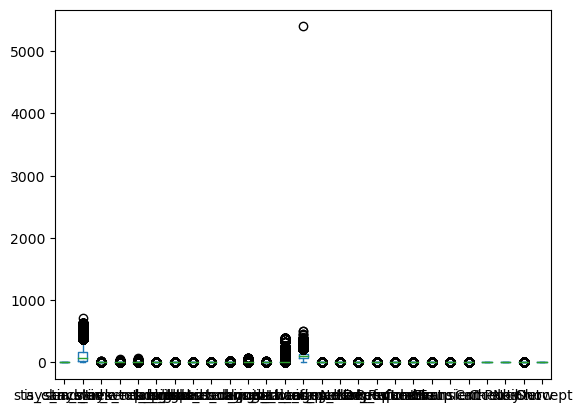

In [31]:
clean_lasso.plot.box()

In [32]:
clean_lasso["booking_changes"].max()

18

Numeric:

In [33]:
y = clean_lasso['adr']
var_num = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'stays_total_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

In [36]:
X_num = clean_lasso.loc[:,var_num]

Dummies:

In [35]:
var_cat = ['is_canceled', 'is_repeated_guest', 'No Deposit', 'Non Refund', 'Refundable', 'Contract', 'Group', 'Transient', 'Transient-Party', 'Canceled', 'Check-Out', 'No-Show']

In [45]:
dummies = clean_lasso.loc[:,var_cat]

In [46]:
X = pd.concat([X_num, dummies],axis=1)


In [47]:
X.columns = X.columns.astype(str)

In [48]:
# Scale data:
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)
X_sc = scaler.transform(X)

In [49]:
# Run LASSO:
reg = linear_model.Lasso(alpha=1.0,
                         warm_start=True,
                         max_iter=2000,
                         fit_intercept=True)
reg.fit(X_sc,y)

sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,lead_time,-3.275545
1,stays_in_weekend_nights,-0.000000
2,stays_in_week_nights,0.000000
3,stays_total_nights,-0.000000
4,adults,10.591240
5,children,13.937894
6,babies,0.000000
7,previous_cancellations,-1.163512
8,previous_bookings_not_canceled,-0.000000
9,booking_changes,0.817179


Variable Selection For Linear Regression Model:

- lead_time
- adult